# -- Project Title:- Fish_Market Weight Predication                         
### Student Name    Batch:- (ML_06)
#### 1)Nitin Borse
#### 2)Ashraf Ali Korbu
#### 3)Tejal Sarvade
#### 4)Rashmi Patil

#### Guided by:- Ankita Kanchan 

### Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Weight: weight of fish in Gram g
Length1: vertical length in cm
Length2: diagonal length in cm
Length3: cross length in cm
Height: height in cm
Width:diagonal width in cm

### Data Cleaning Process

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### Data Exploration
### We'll be using seaborn for plotting the graphs

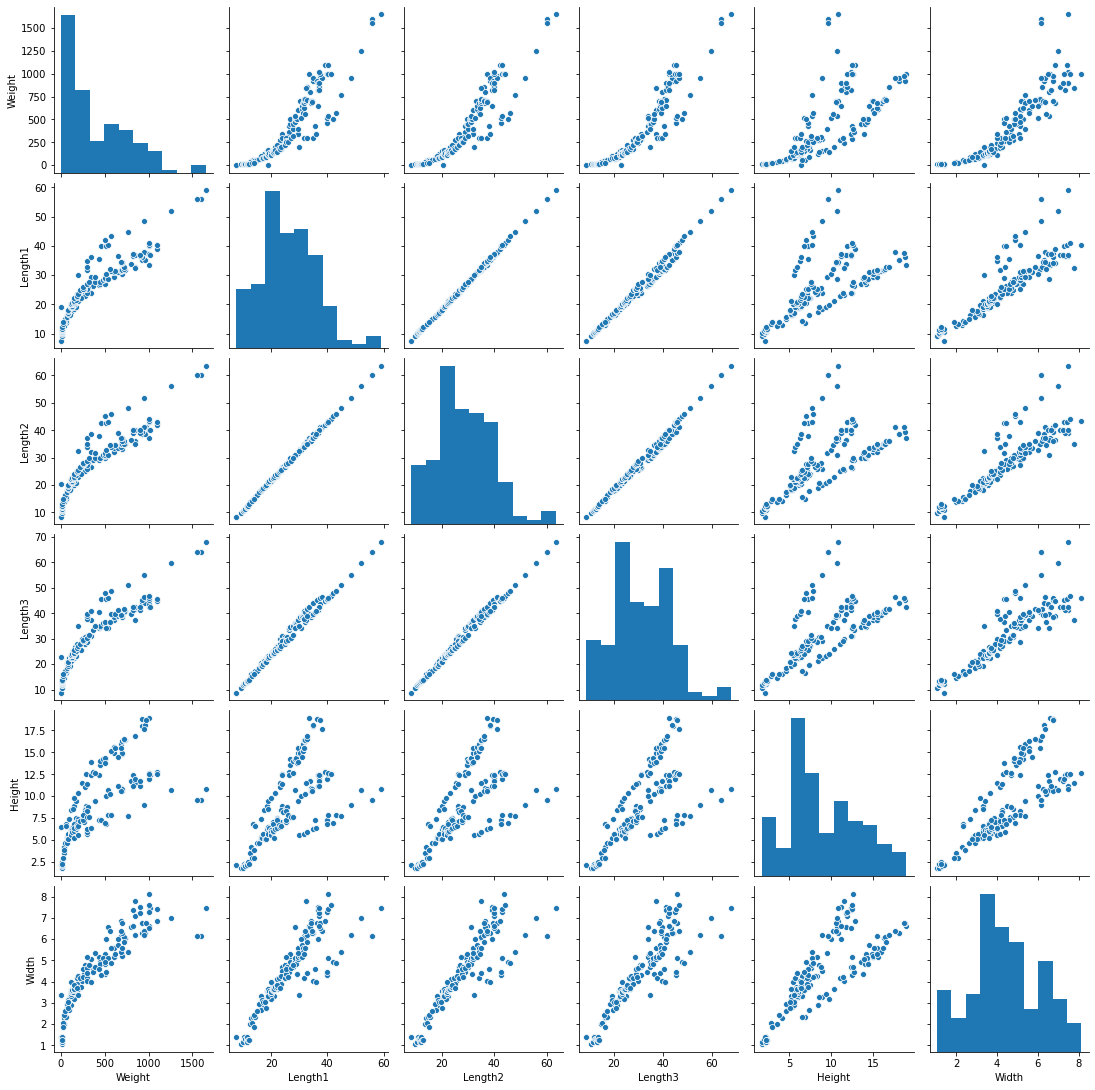

In [6]:
sns.pairplot(df)

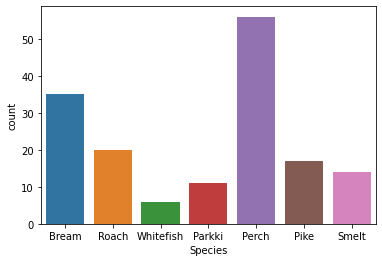

In [7]:
sns.countplot(x=df['Species'])

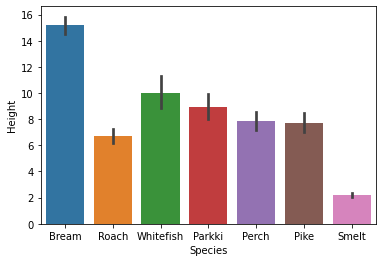

In [8]:
sns.barplot(y=df['Height'],x=df['Species'])

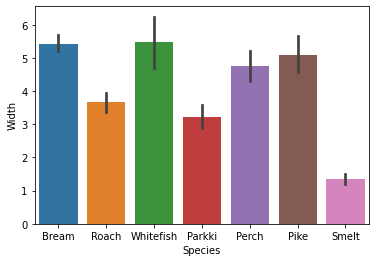

In [9]:
sns.barplot(y=df['Width'],x=df['Species'])

### Find out the Outlier

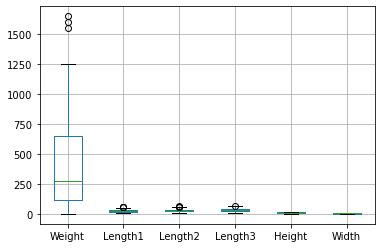

In [49]:
df.boxplot()

### Well it seems like i was wrong after all about the outliers, we'll try and reduce them with the help of IQR

In [16]:
# IQR--> Q3-Q1     Q--> quantile
# IQR ---> interquartile range
# range -- Q1-1.5*IQR to Q3+1.5*IQR

In [3]:
Q1=df.quantile(0.25)
Q1

Weight     120.00000
Length1     19.05000
Length2     21.00000
Length3     23.15000
Height       5.94480
Width        3.38565
Name: 0.25, dtype: float64

In [4]:
Q3=df.quantile(0.75)
Q3

Weight     650.0000
Length1     32.7000
Length2     35.5000
Length3     39.6500
Height      12.3659
Width        5.5845
Name: 0.75, dtype: float64

In [5]:
IQR=Q3-Q1

In [6]:
IQR

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64

In [7]:
(df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)

,Height,Length1,Length2,Length3,Species,Weight,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


In [8]:
new_df=df[~((df<Q1-IQR*1.5) | (df>Q3+IQR*1.5)).any(axis=1)]
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
new_df.shape,df.shape

((156, 7), (159, 7))

In [10]:
new_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


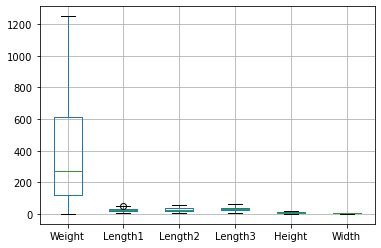

In [11]:
new_df.boxplot()

### Now applying Machine Learning Model
### LinearRegression

### Here i've selected linear Regression model for estimation of weight(dependent variable) with the help of width , length, height etc(independent variable)

In [12]:
x=new_df[["Length1","Length2","Length3","Height"]]   # Lest Seperate out Independent and Dependent
y=new_df["Weight"]

In [13]:
model=LinearRegression()   # Creating Linear Regression Model Instance
model.fit(x,y)             # Directly fit model and predict the outcome
model.score(x,y)

0.8978393479135819

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8930968929359294

In [37]:
model.score(xtest,ytest)

0.9163450193713588

In [38]:
ypred=model.predict(xtest)  

In [39]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
26,720.0,679.623574
54,390.0,464.592001
37,78.0,73.757971
112,685.0,680.883649
24,700.0,670.761831
7,390.0,457.041624
45,160.0,154.176778
107,300.0,446.380022
137,500.0,626.216057
40,0.0,150.863820


In [40]:
residual=ytest-ypred
residual

26      40.376426
54     -74.592001
37       4.242029
112      4.116351
24      29.238169
7      -67.041624
45       5.823222
107   -146.380022
137   -126.216057
40    -150.863820
90     -36.389667
51     -88.437353
108   -112.872068
119     68.081459
56      -6.831395
150    167.891086
33      37.382356
118    -24.446899
44     -52.378361
128   -124.073525
148    155.972952
8      -67.868900
139     60.978201
59     139.055322
111    154.693419
155    127.168825
85     -41.677903
62     -19.409199
83     -25.536143
94      -6.814300
16      92.518926
19      33.867663
Name: Weight, dtype: float64

In [41]:
res=np.mean(residual)
res

-1.5757134989935766

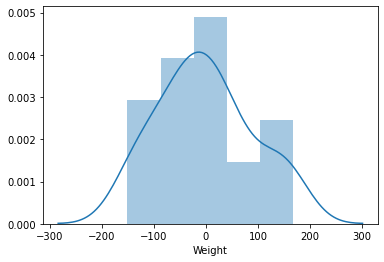

In [42]:
sns.distplot(residual)

In [43]:
print('R2_score:')
print(metrics.explained_variance_score(ytest,ypred))

R2_score:
0.9163713708346546


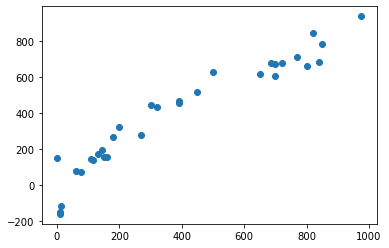

In [44]:
plt.scatter(ytest,ypred)

### Now let's perform some preprocessing with 2nd degree polynomial featuring

In [45]:
pf=PolynomialFeatures()  # defualt 2nd Degree Polynomial feature 

In [46]:
quad=pf.fit_transform(x)

In [54]:
 X_train, X_test, y_train, y_test = train_test_split(quad, y, test_size=0.2,random_state=0)

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.score(X_train,y_train)

0.9811153661018928

In [57]:
pred=model.predict(X_test)

In [58]:
pd.DataFrame({"Actual":y_test,"Predicted":pred})

,Actual,Predicted
26,720.0,694.450064
54,390.0,423.380448
37,78.0,86.648719
112,685.0,672.856619
24,700.0,705.743870
7,390.0,425.128819
45,160.0,169.278279
107,300.0,290.370211
137,500.0,512.115614
40,0.0,116.437957


In [59]:
res=ypred-y_test
res

26     -40.376426
54      74.592001
37      -4.242029
112     -4.116351
24     -29.238169
7       67.041624
45      -5.823222
107    146.380022
137    126.216057
40     150.863820
90      36.389667
51      88.437353
108    112.872068
119    -68.081459
56       6.831395
150   -167.891086
33     -37.382356
118     24.446899
44      52.378361
128    124.073525
148   -155.972952
8       67.868900
139    -60.978201
59    -139.055322
111   -154.693419
155   -127.168825
85      41.677903
62      19.409199
83      25.536143
94       6.814300
16     -92.518926
19     -33.867663
Name: Weight, dtype: float64

In [60]:
np.mean(res)

1.5757134989935766

In [61]:
print('R2_score:',metrics.explained_variance_score(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9490833198558781
MAE: 42.67640201296179
MSE: 4798.439299536956
RMSE: 69.27076800163945


### This score seems to be pretty good, but if we change random_state our train and test samples will be different and our model's score will be different. In order to eliminate this change I will use cross validation

In [62]:
cross_val_score_train = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.96094896 0.97159474 0.99617481 0.94066065 0.97070478 0.98559913
 0.95105021 0.97261598 0.99494391 0.95349362]


The mean of all the above values would give me a almost perfect conclusion about my R2 score

In [63]:
print(np.mean(cross_val_score_train))

0.9697786786274657


## Conclusion
### 1) From above graph we understood that their is linear relation between Weigth Length1	Length2	Length3		Width
### 2) By use of linear regression we got accuracy of 89%,by polynomial regression we got accuracy of 96%